In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Define generators for training, validation and also anomaly data.
batch_size = 1
datagen = ImageDataGenerator(rescale=1./255)

# MURA-v1.1 dataset has been divided manually into 3 classes (folders)
train_negative_generator = datagen.flow_from_directory(
    '/Users/Kyle/Desktop/Python/UPAE/xr_humerus/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='input'
)

valid_positive_generator = datagen.flow_from_directory(
    '/Users/Kyle/Desktop/Python/UPAE/xr_humerus/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='input'
)

valid_negative_generator = datagen.flow_from_directory(
    '/Users/Kyle/Desktop/Python/UPAE/xr_humerus/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='input'
)

 

Found 506 images belonging to 3 classes.
Found 506 images belonging to 3 classes.
Found 506 images belonging to 3 classes.


In [3]:
# Define the autoencoder. 
# Try to make the bottleneck layer size as small as possible to make it easy for
# density calculations and also picking appropriate thresholds. 

#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 16)       0

In [4]:
#Fit the model. 
history = model.fit(
        train_negative_generator,
        steps_per_epoch= 1 // batch_size,
        epochs=300,
        validation_data=valid_positive_generator,
        validation_steps=75 // batch_size,
        shuffle = True)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 0.1333 - mse: 0.1333 - val_loss: 0.1332 - val_mse: 0.1332
Epoch 2/300
1/1 [==============================] - 2s 2s/step - loss: 0.0853 - mse: 0.0853 - val_loss: 0.1294 - val_mse: 0.1294
Epoch 3/300
1/1 [==============================] - 2s 2s/step - loss: 0.0961 - mse: 0.0961 - val_loss: 0.1239 - val_mse: 0.1239
Epoch 4/300
1/1 [==============================] - 2s 2s/step - loss: 0.0901 - mse: 0.0901 - val_loss: 0.1161 - val_mse: 0.1161
Epoch 5/300
1/1 [==============================] - 2s 2s/step - loss: 0.1202 - mse: 0.1202 - val_loss: 0.1119 - val_mse: 0.1119
Epoch 6/300
1/1 [==============================] - 2s 2s/step - loss: 0.1349 - mse: 0.1349 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 7/300
1/1 [==============================] - 2s 2s/step - loss: 0.0800 - mse: 0.0800 - val_loss: 0.1098 - val_mse: 0.1098
Epoch 8/300
1/1 [==============================] - 2s 2s/step - loss: 0.0771 - mse: 0.0771 - val_loss: 0

1/1 [==============================] - 3s 3s/step - loss: 0.4454 - mse: 0.4454 - val_loss: 0.1130 - val_mse: 0.1130
Epoch 65/300
1/1 [==============================] - 3s 3s/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0789 - val_mse: 0.0789
Epoch 66/300
1/1 [==============================] - 3s 3s/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0710 - val_mse: 0.0710
Epoch 67/300
1/1 [==============================] - 3s 3s/step - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 68/300
1/1 [==============================] - 3s 3s/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0738 - val_mse: 0.0738
Epoch 69/300
1/1 [==============================] - 3s 3s/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0739 - val_mse: 0.0739
Epoch 70/300
1/1 [==============================] - 3s 3s/step - loss: 0.0561 - mse: 0.0561 - val_loss: 0.0569 - val_mse: 0.0569
Epoch 71/300
1/1 [==============================] - 3s 3s/step - loss: 0.0646 - mse: 0.0646 - val_loss: 0.0795

1/1 [==============================] - 3s 3s/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0772 - val_mse: 0.0772
Epoch 128/300
1/1 [==============================] - 3s 3s/step - loss: 0.0402 - mse: 0.0402 - val_loss: 0.0948 - val_mse: 0.0948
Epoch 129/300
1/1 [==============================] - 3s 3s/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0942 - val_mse: 0.0942
Epoch 130/300
1/1 [==============================] - 3s 3s/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0737 - val_mse: 0.0737
Epoch 131/300
1/1 [==============================] - 3s 3s/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 132/300
1/1 [==============================] - 3s 3s/step - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0805 - val_mse: 0.0805
Epoch 133/300
1/1 [==============================] - 3s 3s/step - loss: 0.0495 - mse: 0.0495 - val_loss: 0.0784 - val_mse: 0.0784
Epoch 134/300
1/1 [==============================] - 3s 3s/step - loss: 0.0694 - mse: 0.0694 - val_loss:

1/1 [==============================] - 3s 3s/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.1003 - val_mse: 0.1003
Epoch 191/300
1/1 [==============================] - 3s 3s/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0807 - val_mse: 0.0807
Epoch 192/300
1/1 [==============================] - 3s 3s/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0636 - val_mse: 0.0636
Epoch 193/300
1/1 [==============================] - 3s 3s/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0863 - val_mse: 0.0863
Epoch 194/300
1/1 [==============================] - 3s 3s/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0912 - val_mse: 0.0912
Epoch 195/300
1/1 [==============================] - 3s 3s/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0789 - val_mse: 0.0789
Epoch 196/300
1/1 [==============================] - 3s 3s/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0748 - val_mse: 0.0748
Epoch 197/300
1/1 [==============================] - 3s 3s/step - loss: 0.0485 - mse: 0.0485 - val_loss:

1/1 [==============================] - 3s 3s/step - loss: 0.0422 - mse: 0.0422 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 254/300
1/1 [==============================] - 3s 3s/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0774 - val_mse: 0.0774
Epoch 255/300
1/1 [==============================] - 3s 3s/step - loss: 0.1207 - mse: 0.1207 - val_loss: 0.0938 - val_mse: 0.0938
Epoch 256/300
1/1 [==============================] - 3s 3s/step - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0691 - val_mse: 0.0691
Epoch 257/300
1/1 [==============================] - 3s 3s/step - loss: 0.0627 - mse: 0.0627 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 258/300
1/1 [==============================] - 3s 3s/step - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0781 - val_mse: 0.0781
Epoch 259/300
1/1 [==============================] - 3s 3s/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0709 - val_mse: 0.0709
Epoch 260/300
1/1 [==============================] - 3s 3s/step - loss: 0.0241 - mse: 0.0241 - val_loss:

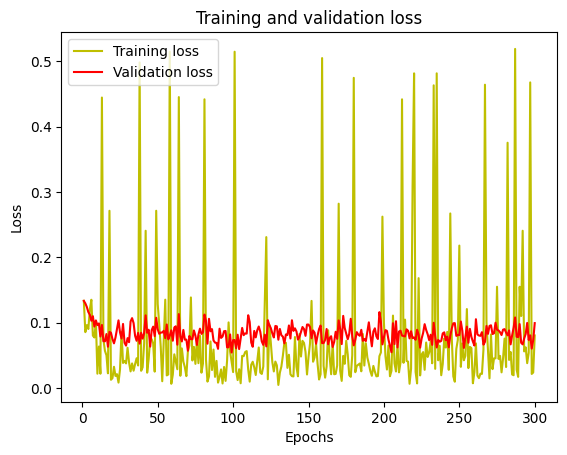

In [5]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# Get all batches generated by the datagen and pick a batch for prediction
#Just to test the model. 
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_negative_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_negative_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])  #Predict on the first batch of images

1/1 [==============================] - 0s 255ms/step


IndexError: index 1 is out of bounds for axis 0 with size 1

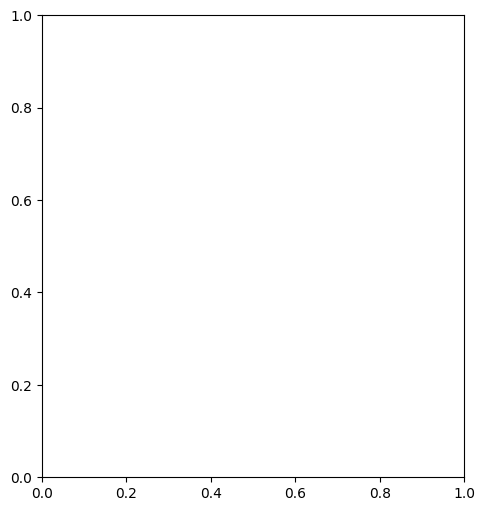

In [7]:
#Sanity check, view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

In [10]:
#Let us examine the reconstruction error between our positive and negative validation data
validation_positive_error = model.evaluate(valid_positive_generator)
validation_negative_error = model.evaluate(valid_negative_generator)

print("Recon. error for the positive validation data is: ", validation_positive_error)
print("Recon. error for the negative validation data is: ", validation_negative_error)

506/506 [==============================] - 19s 38ms/step - loss: 0.0809 - mse: 0.0809
Recon. error for the positive validation data is:  [0.08088953793048859, 0.08088947832584381]
Recon. error for the negative validation data is:  [0.08088944107294083, 0.08088941127061844]
